# Task 4.3

Based on the criterias given I have found a resoult for each filter type. The code is first finding the order needed to achive the criterias, then creating a frequency respons for the filter. The frequency respons is then plotted with dB on the y-axis and a logaritmic scale for frequency on the x-axis.


The order of the filter to achive the wanted characteristics.
Butterworth:   6
Chebyshev 1:   5
Chebyshev 2:   5
Elliptic   :   4


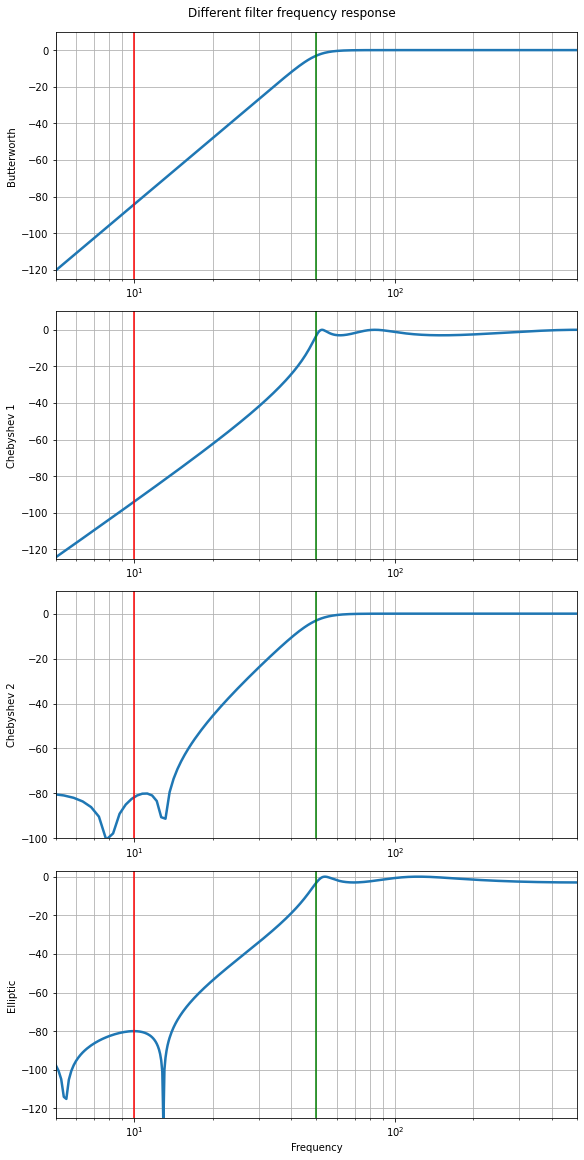

In [66]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Fs = 1000
fp = 50
fs = 10
nyq = Fs/2

#Butterworth
bN, bWn = signal.buttord(fp, fs, 3, 80, analog = False, fs=Fs) 
bb, ba = signal.butter(bN, bWn, 'h', analog = False, fs=Fs)
bw, bh = signal.freqz(bb, ba, worN=1024)

#Chebyshev 1
cN, cWn = signal.cheb1ord(fp, fs, 3, 80, analog = False, fs=Fs)
cb, ca = signal.cheby1(cN, 3, cWn,'h', analog=False, fs=Fs)
cw, ch = signal.freqz(cb, ca, worN=1024)

#Chebyshev 2
c2N, c2Wn = signal.cheb2ord(fp, fs, 3, 80, analog = False, fs=Fs) 
c2b, c2a = signal.cheby2(c2N, 80, c2Wn,'h', analog=False, fs=Fs)
c2w, c2h = signal.freqz(c2b, c2a, worN=1024)

#Elliptic
eN, eWn = signal.ellipord(fp, fs, 3, 80, False, fs = Fs)
esos = signal.ellip(eN, 3, 80, eWn, 'h', False, 'sos', fs = Fs)
ew, eh = signal.sosfreqz(esos, worN =4*1024)

fig1, axs = plt.subplots(4,1,figsize=(8,16),constrained_layout=True)
fig1.suptitle('Different filter frequency response')

axs[0].semilogx(bw/np.pi*nyq, 20 * np.log10(abs(bh)), linewidth = 2.5)
axs[0].set_ylabel('Butterworth')
axs[0].grid(which='both', axis='both')
axs[0].axvline(fp, color='green') # cutoff frequency
axs[0].axvline(fs, color='red')
axs[0].axis([1e1/2, nyq, -125, 10]);

axs[1].semilogx(cw/np.pi*nyq, 20 * np.log10(abs(ch)), linewidth = 2.5)
axs[1].set_ylabel('Chebyshev 1')
axs[1].grid(which='both', axis='both')
axs[1].axvline(fp, color='green') # cutoff frequency
axs[1].axvline(fs, color='red')
axs[1].axis([1e1/2, nyq, -125, 10]);

axs[2].semilogx(c2w/np.pi*nyq, 20 * np.log10(abs(c2h)), linewidth = 2.5)
axs[2].set_ylabel('Chebyshev 2')
axs[2].grid(which='both', axis='both')
axs[2].axvline(fp, color='green') # cutoff frequency
axs[2].axvline(fs, color='red')
axs[2].axis([1e1/2, nyq, -100, 10]);

axs[3].semilogx(ew/np.pi*nyq, 20 * np.log10(abs(eh)), linewidth=2.5)
axs[3].set_ylabel('Elliptic')
axs[3].grid(which='both', axis='both')
axs[3].axvline(fp, color='green') # cutoff frequency
axs[3].axvline(fs, color='red')
axs[3].axis([1e1/2, nyq, -125, 3]);

axs[3].set_xlabel('Frequency (Hz)')

print('The order of the filter to achive the wanted characteristics.')
print('Butterworth:  ', bN)
print('Chebyshev 1:  ', c2N)
print('Chebyshev 2:  ', cN)
print('Elliptic   :  ', eN)



Looking at the results the butterworth filter have no ripple in both stopband and passband. The Chebyshev type 1 have some ripple in the passband but nothing in the stopband. The chebyshev type 2 has no ripple in the passband, but rippels in the stopband below -80 dB. The Elliptic high pass filter have less ripple in the passband than the chebyshev type 1 filter, but big ripples in the stoppband. These ripples are below -80 dB, same as the chebyshev type 2 filter, so the effect of them will not effect the filtering properties. 

The Elliptic filter needs the lowest order to achive the criteria with a order of 4. Butterworth needs the highest order with 6, and the Chebyshev filters in the middle with 5th order.